# Pandas and Scikit-learn

(Credit note: This tutorial series on Kaggle's Titanic Competition is an adpatation of the Pycon UK Introductory Tutorial given by Ezzeri Esa. The original version can be found here: https://github.com/savarin/pyconuk-introtutorial

Compared to the orginal Pycon introductory tutorial, more sophiticated analyses have been added in this tutorial for:

- data exploration and visualisation
- data preprocessing including and feature selection
- cross-validation and hyper-parameters tuning for various model types through the use of --pipelines model comparison with statistical significance tests: on accuracy and area under the ROC curves estimated from cross-validation)

Pandas is a Python library that contains high-level data structures and manipulation tools designed for data analysis. Think of Pandas as a Python version of Excel. Scikit-learn, on the other hand, is an open-source machine learning library for Python.
While Scikit-learn does a lot of the heavy lifting, what's equally important is ensuring that raw data is processed in such a way that we are able to 'feed' it to Scikit-learn. Hence, the ability to manipulate raw data with Pandas makes it an indispensible part of our toolkit.
## Kaggle
Kaggle is the leading platform for data science competitions. Participants compete for cash prizes by submitting the best predictive model to problems posted on the competition website.
https://www.kaggle.com/competitions

Learning machine learning via Kaggle problems allows us to take a highly-directed approach because:
The problems are well-defined and the data is provided, allowing us to immediately focus on manipulating the data, and
The leaderboard allows us to keep track of how well we're doing.
In the following set of exercises, we will be reviewing the data from the Kaggle Titanic competition. Our aim is to make predictions on whether or not specific passengers on the Titanic survived, based on characteristics such as age, sex and class.

# Section 1 - Cleaning and exploring the data

We will start by processing the training data, after which we will be able to use to 'train' (or 'fit') our model. With the trained model, we apply it to the test data to make the predictions. Finally, we output our predictions into a .csv file to make a submission to Kaggle and see how well they perform.
It is very common to encounter missing values in a data set. In this section, we will take the simplest (or perhaps, simplistic) approach of ignoring the whole row if any part of it contains an NaN value. We will build on this approach in later sections.

# Pandas - Extracting data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv')

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


## Pandas - Cleaning data

In [2]:
# Drop the irelevant variables
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill in missing values with a mean
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

from scipy.stats import mode

# Fill in missing values with mode for discrete variables
mode_embarked = mode(df['Embarked'])[0][0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

/Applications/CompTools/miniconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


As there are only two unique values for the column Sex, we have no problems of ordering.

In [3]:
df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)

For the column Embarked, however, replacing {C, S, Q} by {1, 2, 3} would seem to imply the ordering C < S < Q when in fact they are simply arranged alphabetically.

To avoid this problem, we create dummy variables. Essentially this involves creating new columns to represent whether the passenger embarked at C with the value 1 if true, 0 otherwise. Pandas has a built-in function to create these columns automatically.

In [4]:
pd.get_dummies(df['Embarked'], prefix='Embarked').head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


We now concatenate the columns containing the dummy variables to our main dataframe.

In [5]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1)

**Exercise**

- Write the code to create dummy variables for the column Sex.

In [6]:
# Your code here






In [7]:
df = df.drop(['Sex', 'Embarked'], axis=1)

# Put column name to a list
cols = df.columns.tolist()

# Reoder the column names and the dataframe (df) according the new column order
cols = [cols[1]] + cols[0:1] + cols[2:]
df = df[cols]

We review our processed training data.

In [8]:
df.head(10)

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,0,1,3,22.000000,1,0,7.2500,1,0,0,1
1,1,2,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,3,26.000000,0,0,7.9250,0,0,0,1
3,1,4,1,35.000000,1,0,53.1000,0,0,0,1
4,0,5,3,35.000000,0,0,8.0500,1,0,0,1
5,0,6,3,29.699118,0,0,8.4583,1,0,1,0
6,0,7,1,54.000000,0,0,51.8625,1,0,0,1
7,0,8,3,2.000000,3,1,21.0750,1,0,0,1
8,1,9,3,27.000000,0,2,11.1333,0,0,0,1
9,1,10,2,14.000000,1,0,30.0708,0,1,0,0


In [9]:
# Summarise the dataset: descriptive statistics
df.describe()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.725028
std,0.486592,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


#Visualising the data
Data visualisation can be performed using Pandas and Matplotlib.

In [10]:
# %matplotlib inline: To make matplotlib inline graphics
%matplotlib inline 
import matplotlib.pyplot as plt

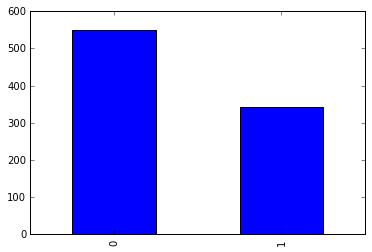

In [11]:
# Histograms for checking the distributions of the variables.
df.Survived.value_counts().plot(kind='bar')

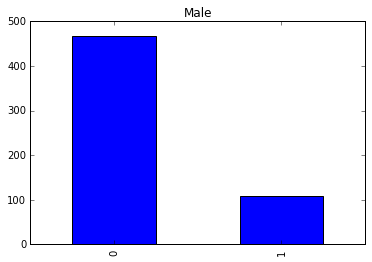

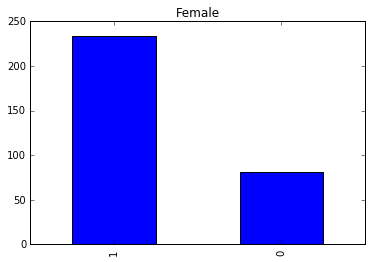

In [12]:
plt.figure()
df['Survived'][df['Gender']==1].value_counts().plot(kind='bar', title='Male')
plt.figure()
df['Survived'][df['Gender']==0].value_counts().plot(kind='bar', title='Female')

Remarks: 
It is shown in the above histograms (or bar charts) that the survival rate is much higher for femle than for male. Hence gender might be a good predictor variable for survival.

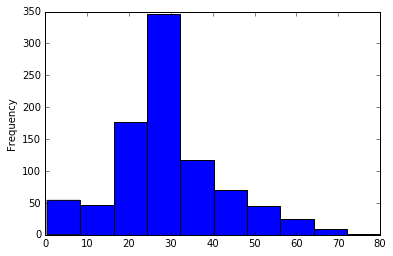

In [13]:
df['Age'].plot(kind='hist') # Histogram for age

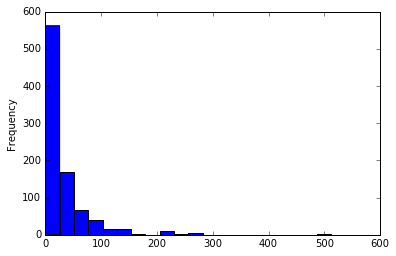

In [14]:
df['Fare'].plot(kind='hist', bins=20) # Histogram for Fare

### Sometimes it's better to work the data in a log scale
E.g. as we can see from the histogram of Fare, the distribution of this variable is quite skewed (not symmetric, not in bell shape), it is thus sometimes useful to transform the data to a logarithmic scale. 

('Number of zeros in Fare: ', 15)


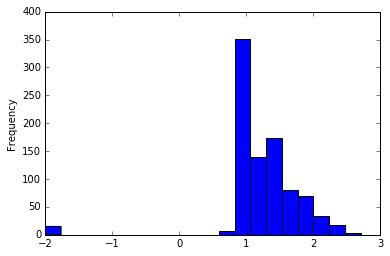

In [15]:
print('Number of zeros in Fare: ', sum(df['Fare']==0))
x = np.log10(df['Fare'])
x[np.isneginf(x)] = -2 # using a negative value to replace -inf
df['Fare_log'] = x
df['Fare_log'].plot(kind='hist', bins=20)

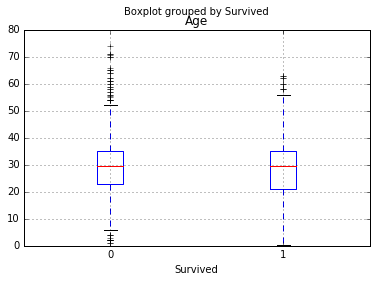

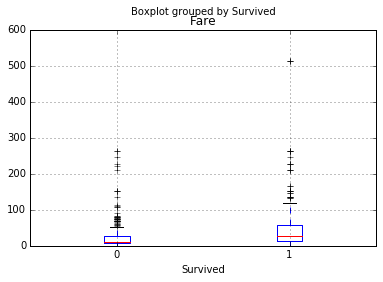

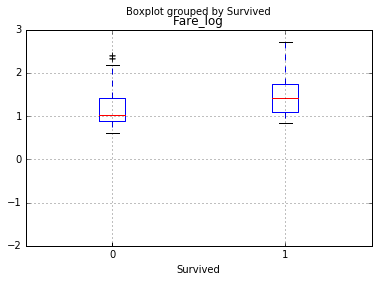

In [16]:
# Boxplots to compare the distribution of continuous variables by groups
df.boxplot(column='Age', by='Survived')
df.boxplot(column='Fare', by='Survived')
df.boxplot(column='Fare_log', by='Survived')

Remarks: 
1. There are no significant difference in age between survival and non-survival group. 
2. The mean fare for the survival group seems to be higher than the one for the non-survival group.

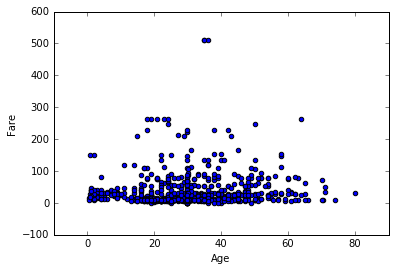

In [17]:
# Scatter plots: to check the correlation between two variables

# sometimes it's better to visualise the data in a log scale
ax = df.plot(kind='scatter', x='Age', y='Fare')

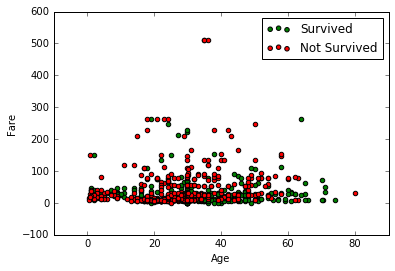

In [18]:
# Visualise the data by groups in colors
df0=df[df['Survived']==0] # subset of data
df1=df[df['Survived']==1] # subset of data
ax = df0.plot(kind='scatter', x='Age', y='Fare', color='green', label='Survived')
df1.plot(kind='scatter', x='Age', y='Fare', color='red', label='Not Survived', ax=ax)

In [19]:
# Get array data from the data frame for modelling in scikit-learn
df = df.drop(['Fare_log'], axis=1)

print(df.head(10))
train_data = df.values

   Survived  PassengerId  Pclass        Age  SibSp  Parch     Fare  Gender  \
0         0            1       3  22.000000      1      0   7.2500       1   
1         1            2       1  38.000000      1      0  71.2833       0   
2         1            3       3  26.000000      0      0   7.9250       0   
3         1            4       1  35.000000      1      0  53.1000       0   
4         0            5       3  35.000000      0      0   8.0500       1   
5         0            6       3  29.699118      0      0   8.4583       1   
6         0            7       1  54.000000      0      0  51.8625       1   
7         0            8       3   2.000000      3      1  21.0750       1   
8         1            9       3  27.000000      0      2  11.1333       0   
9         1           10       2  14.000000      1      0  30.0708       0   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0        

###PCA : visualise the data in lower dimensionality

It's often desirable to normalise the data before performing PCA. As PCA is a kind of unsupervised learning, and it tries to identify the transformation that maximise the variances explained. Variables with large scale (e.g. fare) will could dominate the first PCs without normalising the data. 

In [20]:
scale        = lambda x: (x - x.mean()) / x.std()
from sklearn.decomposition import PCA

# use .iloc to get subset of DataFrame
df_std = df.iloc[0:,2:].apply(scale)

pca   = PCA(n_components = 4).fit(df_std)
vr = pca.explained_variance_ratio_
print("Variance exlained : %0.3f, %0.3f, %0.3f, %0.3f" % (vr[0], vr[1], vr[2], vr[3]))
print("Total variance explained with the first 4 PCs: %0.3f" % (sum(vr)))
print(pca.components_)


Xtrans = pca.transform(df_std)
dfx = pd.DataFrame(Xtrans, columns=['PC1', 'PC2', 'PC3', 'PC4'])

Variance exlained : 0.240, 0.197, 0.182, 0.114
Total variance explained with the first 4 PCs: 0.732
[[-0.42671152  0.16002169 -0.01641143  0.05889959  0.45140388 -0.21054923
   0.54539102  0.02326465 -0.49242542]
 [ 0.10728231  0.23722477 -0.50861783 -0.5549069  -0.30696611  0.27875197
   0.13589361  0.29018073 -0.30165935]
 [-0.44981484  0.42607742 -0.2539876  -0.20214107  0.18619968  0.1882633
  -0.13715591 -0.48875237  0.42772646]
 [ 0.17457599 -0.40034082  0.0492266  -0.04399802 -0.11705341  0.44513097
   0.49527806 -0.58610286 -0.06504897]]


Remark:
73% of variance has been explained by using the first four PCs. We could then plot the transformed data in a lower dimensional space and see if any patterns can be found in the data.

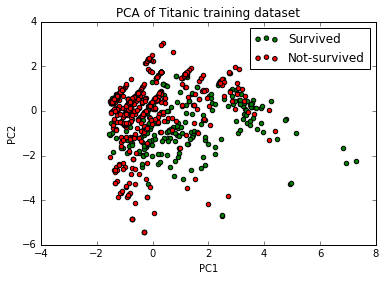

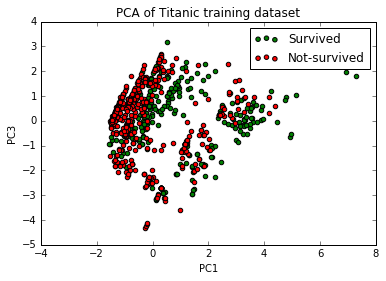

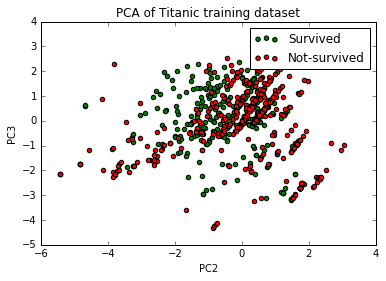

In [21]:
# Plot the data using the first three PCs
plt.figure()
ax=dfx[df['Survived']==1].plot(kind='scatter', x='PC1', y='PC2', color='green', label='Survived')
dfx[df['Survived']==0].plot(kind='scatter', x='PC1', y='PC2', color='red', label='Not-survived',ax=ax)
plt.title('PCA of Titanic training dataset')

ax=dfx[df['Survived']==1].plot(kind='scatter', x='PC1', y='PC3', color='green', label='Survived')
dfx[df['Survived']==0].plot(kind='scatter', x='PC1', y='PC3', color='red', label='Not-survived',ax=ax)
plt.title('PCA of Titanic training dataset')

ax=dfx[df['Survived']==1].plot(kind='scatter', x='PC2', y='PC3', color='green', label='Survived')
dfx[df['Survived']==0].plot(kind='scatter', x='PC2', y='PC3', color='red', label='Not-survived',ax=ax)
plt.title('PCA of Titanic training dataset')

Remark:
It appears that the two classes overlap a lot in the PCA plots. 

## Scikit-learn - Training the model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model = model.fit(train_data[0:,2:],train_data[0:,0])

# Checking training set performance (be aware that this is not a 
#       good estimate for generalisation performance)
print(classification_report(model.predict(train_data[0:,2:]),train_data[0:,0]))
print(confusion_matrix(model.predict(train_data[0:,2:]),train_data[0:,0]))

             precision    recall  f1-score   support

        0.0       0.87      0.82      0.84       579
        1.0       0.70      0.77      0.73       312

avg / total       0.81      0.80      0.80       891

[[476 103]
 [ 73 239]]


## Scikit-learn - Making predictions

In [23]:
df_test = pd.read_csv('../data/test.csv')

df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
# The test set contains missing values for Age and Fare
df_test['Age'] = df_test['Age'].fillna(age_mean)
 
fare_means = df.pivot_table('Fare', index='Pclass', aggfunc='mean')
df_test['Fare'] = df_test[['Fare', 'Pclass']].apply(lambda x:
                            fare_means[x['Pclass']] if pd.isnull(x['Fare'])
                            else x['Fare'], axis=1)

df_test['Gender'] = df_test['Sex'].map({'female': 0, 'male': 1}).astype(int)

/Applications/CompTools/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: scalar indexers for index type Int64Index should be integers and not floating point


Similarly we create dummy variables for the test data.

In [25]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'], prefix='Embarked')],
                axis=1)

In [26]:
df_test = df_test.drop(['Sex', 'Embarked'], axis=1)

test_data = df_test.values

output = model.predict(test_data[:,1:])

## Pandas - Preparing for submission

In [27]:
result = np.c_[test_data[:,0].astype(int), output.astype(int)]
df_result = pd.DataFrame(result[:,0:2], columns=['PassengerId', 'Survived'])
df_result.to_csv('results/titanic_0.csv', index=False)

**Exercise** 
- Obtain the probability output for model prediction 

Hint: using model.predict_proba(X) ), and write both the predicted probability output for class 1-survived and labels to the same result file. 
And "numpy.column_stack" or "numpy.concatenate" can be used to combine two arrays by column. 

- Build a model using the same training data and counting the percentage of agreed cases in the predicted output for the two types of models.